# Netflix movies data analysis

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import data

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<u>We have 12 columns with 8807 rows some having null values for some columns. For now we will leave them in.</u>

### What is the most popular release year for movies on netflix?

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Create a subset containing only the title that are movies

In [5]:
movies_df = df[df['type'] == 'Movie'] 

Grouping by year and finding the number of titles released that year then sorting them descendingly to see the most popular release year.

In [6]:
movies_df.groupby(['release_year'])['show_id'].count().sort_values(ascending=False)

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1961      1
1963      1
1966      1
1947      1
1946      1
Name: show_id, Length: 73, dtype: int64

<u>It look like both 2017, and 2018 were the most popular release years, having released 767 titles.</u>

<AxesSubplot: xlabel='release_year'>

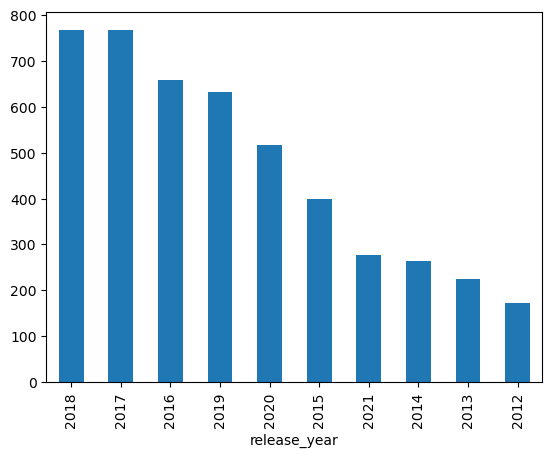

In [9]:
movies_df.groupby(['release_year'])['show_id'].count().sort_values(ascending=False).head(10).plot(kind='bar')

### What Year did Netflix add most content to the platform?

For answering this question we will have to take the date from the dat_added column.

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


First we will convert the 'date_added' column to a dattime type.

In [12]:
df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'])

/tmp/ipykernel_15543/1426150602.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'])


We can take the year by selecting the last four charachters of the string.

In [22]:
df.groupby(by=df['date_added'].dt.year)['show_id'].count().sort_values(ascending=False)

date_added
2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: show_id, dtype: int64

<AxesSubplot: xlabel='date_added'>

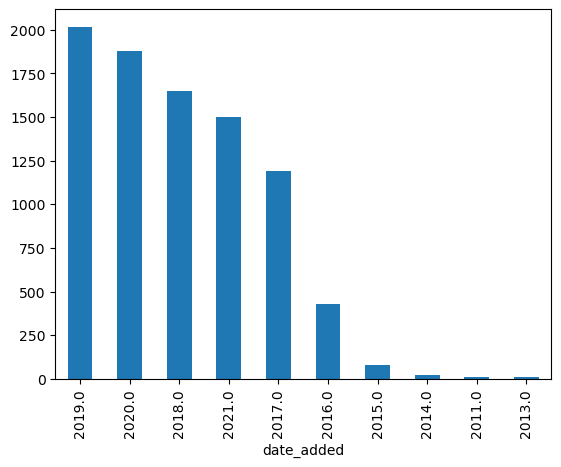

In [27]:
df.groupby(by=df['date_added'].dt.year)['show_id'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<u>We see that the most titles were added to the platform in the year 2019, with a total of 2016 shows and movies.</u>

### Independent of Year, which month is the most popular for netflix to add new content?

To answer this we can repeat the procedure above but for month instead of year

create a new column to store the release month, by extracting it from 'date_added'. We will use this column to groupby to answer our question.

In [13]:
df['month_added'] = df['date_added'].dt.month_name()

In [14]:
df.groupby(['month_added'])['show_id'].count().sort_values(ascending=False)

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: show_id, dtype: int64

<AxesSubplot: xlabel='month_added'>

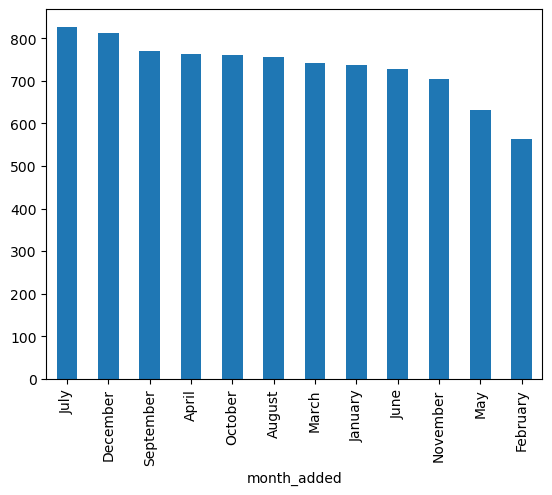

In [28]:
df.groupby(['month_added'])['show_id'].count().sort_values(ascending=False).plot(kind='bar')

<u>We see that, independent of year, the most number of shows and movies were added in the month of July.</u>

### What is the movie with the longest title in the dataset?

In [15]:
df.iloc[df['title'].map(lambda x: len(x)).idxmax()]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton' is the longest title on netflix

### Which actor/actress shows up most frequently in the database?

Going through each row and increasing the count of the number of times the actor/actress shows up.

In [16]:
cast_dict = {}
cast_df = df['cast'].dropna().map(lambda x: x.split(', '))
for row in cast_df:
    for name in row:
        name = name.lower()
        if name in cast_dict:
            cast_dict[name] += 1
        else:
            cast_dict[name] = 1

In [17]:
pd.Series(cast_dict).sort_values(ascending=False)

anupam kher                43
shah rukh khan             35
julie tejwani              33
takahiro sakurai           32
naseeruddin shah           32
                           ..
melanie straub              1
gabriela maria schmeide     1
helena zengel               1
daniel valenzuela           1
chittaranjan tripathy       1
Length: 36428, dtype: int64

<AxesSubplot: >

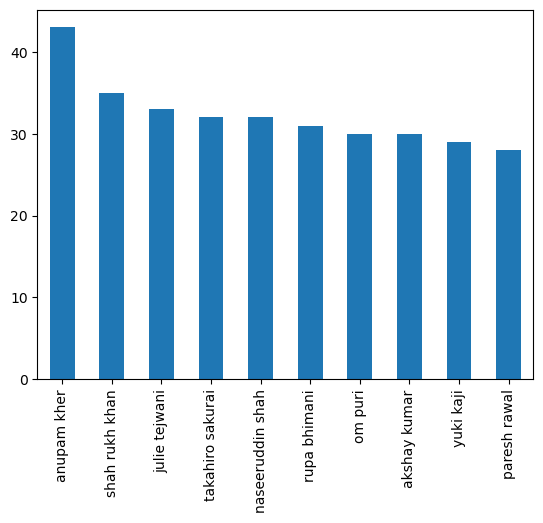

In [29]:
pd.Series(cast_dict).sort_values(ascending=False).head(10).plot(kind='bar')

<u>We see that the actor/actress that shows up the most is Anupam Kher, with 43 shows/movies, followed by Shah Rukh Khan.</u>